**In the initial section of the notebook, our focus is on importing the dataset from Excel, conducting an exploratory analysis to gain insights into its composition, and addressing key aspects such as data types, handling missing values and managing duplicate entries.**

In [1]:
# Let's begin by importing the necessary packages for our analysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

In [2]:
# Importing the excel file 
path = 'C:\\Users\\ivanl\\Downloads\\dataset.xlsx'
df = pd.read_excel(path) 
df.head(5)

,Invoice,Sales Product,Stock Code,Alpha Code,Alpha Code.1,Quantity,Invoice Date,Price per Unit,Customer,Customer ID,Industry,Country,Unnamed: 12,Distributor,Operating Division,Unnamed: 15,Final Price,Invoice Month,Day of week
0,553503,NEOPOLEN P 9230 K BS,90214Y,NEOPOLEN P EX BSW,DLG,1,2011-05-17 13:20,0.83,SCHATTDECOR DO BRASI,14606,#,Romania,RO,Distributor no,PERFORMANCE MATERIAL,PM,0.83,May,Tuesday
1,536591,NEOPOLEN P 9255 BSW,90214V,NEOPOLEN P EX BSW,DLG,1,2010-12-01 16:57,0.83,SCHATTDECOR DO BRASI,14606,#,Romania,RO,Distributor no,PERFORMANCE MATERIAL,PM,0.83,December,Wednesday
2,556202,NEOPOLEN P 9255 BSW,90214V,NEOPOLEN P EX BSW,DLG,1,2011-06-09 13:08,0.83,SCHATTDECOR DO BRASI,14606,#,Romania,RO,Distributor no,PERFORMANCE MATERIAL,PM,0.83,June,Thursday
3,536591,NEOPOLEN P 9225 K BS,90214S,NEOPOLEN P EX BSW,DLG,1,2010-12-01 16:57,0.83,SCHATTDECOR DO BRASI,14606,#,Romania,RO,Distributor no,PERFORMANCE MATERIAL,PM,0.83,December,Wednesday
4,537765,NEOPOLEN P 9225 K BS,90214S,NEOPOLEN P EX BSW,DLG,2,2010-12-08 12:08,0.83,SCHATTDECOR DO BRASI,14606,#,Romania,RO,Distributor no,PERFORMANCE MATERIAL,PM,1.66,December,Wednesday


In [3]:
# Description of the data:
print('Total number of observations is ', len(df)) # 203891
print(df.describe()) # for each numeric column, the count is the same number as the total number of observations => we don't have any missing values

# we can also check the missing values with the following line:
print(df.isnull().sum())

# checking the data types
df.dtypes # Invoice Date is object so we convert it to datetime type
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df

# are there any duplicate rows?
duplicateRows = df[df.duplicated()]
duplicateRows # 2265 duplicate rows, so we drop them:
df_no_duplicates = df.drop_duplicates()
df=df_no_duplicates

Total number of observations is  203891
             Invoice       Quantity  Price per Unit    Customer ID  \
count  203891.000000  203891.000000    203891.00000  203891.000000   
mean   549651.687814      12.585068         2.90659   15289.184221   
std      7583.459534      32.840602         2.82691    1727.360851   
min    536365.000000       1.000000         0.04000   12347.000000   
25%    543277.000000       2.000000         1.25000   13869.000000   
50%    549577.000000       6.000000         1.95000   15152.000000   
75%    556202.000000      12.000000         3.75000   16839.000000   
max    563237.000000    1056.000000        16.95000   18287.000000   

         Final Price  
count  203891.000000  
mean       23.608508  
std        77.791861  
min         0.100000  
25%         5.000000  
50%        12.600000  
75%        19.800000  
max      5970.000000  
Invoice               0
Sales Product         0
Stock Code            0
Alpha Code            0
Alpha Code.1          0
Qu

In [4]:
# lets see again the description of the data 
df.describe(include=['object','float','int'])

,Invoice,Sales Product,Stock Code,Alpha Code,Alpha Code.1,Quantity,Price per Unit,Customer,Customer ID,Industry,Country,Unnamed: 12,Distributor,Operating Division,Unnamed: 15,Final Price,Invoice Month,Day of week
count,201626.000000,201626,201626,201626,201626,201626.000000,201626.000000,201626,201626.000000,201626,201626,201626,201626,201626,201626,201626.000000,201626,201626
unique,NaN,3225,3290,671,704,NaN,NaN,3154,NaN,18,110,110,3,6,6,NaN,9,6
top,NaN,OASE WHITE ENRICHED,85123A,CATALOG PRODUCTS,CHD,NaN,NaN,Permakem AS,NaN,#,Bulgaria,BG,Distributor no,INTERMEDIATES,CI,NaN,May,Thursday
freq,NaN,1324,1324,9358,9358,NaN,NaN,3488,NaN,100870,43670,43670,150079,65448,65448,NaN,27906,41694
mean,549670.543085,NaN,NaN,NaN,NaN,12.694117,2.911526,NaN,15283.123347,NaN,NaN,NaN,NaN,NaN,NaN,23.820021,NaN,NaN
std,7577.921095,NaN,NaN,NaN,NaN,32.989617,2.832023,NaN,1728.095331,NaN,NaN,NaN,NaN,NaN,NaN,78.194771,NaN,NaN
min,536365.000000,NaN,NaN,NaN,NaN,1.000000,0.040000,NaN,12347.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,NaN,NaN
25%,543292.000000,NaN,NaN,NaN,NaN,2.000000,1.250000,NaN,13862.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.040000,NaN,NaN
50%,549590.000000,NaN,NaN,NaN,NaN,6.000000,1.950000,NaN,15146.000000,NaN,NaN,NaN,NaN,NaN,NaN,12.750000,NaN,NaN
75%,556214.000000,NaN,NaN,NaN,NaN,12.000000,3.750000,NaN,16832.000000,NaN,NaN,NaN,NaN,NaN,NaN,19.800000,NaN,NaN


*What can we see from the describe() function?*

1. The minimum number of units sold between 2010 and 2011 was 1
2. The maximum number of units sold between 2010 and 2011 was 1056
3. The average number of units sold between 2010 and 2011 was 12.7
4. The smallest revenue was 0.1, the largest revenue was 5970, and the average revenue was 23.8
5. We have 3225 unique sales products (OASE WHITE ENRICHED is the top one), and 3154 customers (Permakem AS being the mos frequent one)
6. We covered 110 countries, where Bulgaria is our top country
7. The most invoices happened in May

**In the following segment of the notebook, we'll delve into various metrics, KPIs and statistical insights derived from the dataset.**

In [5]:
# What is the total revenue?
print('Total revenue: ', df['Final Price'].sum()) # 4802735.46

# Unique number of issued invoices?
print ('Unique number of issued invoices: ', df['Invoice'].nunique()) # 10292

# Total quantity of sales units?
print('The total quantity of sales units: ', df['Quantity'].sum()) # 2559464

# Average amount of an invoice?
print('Average amount of an invoice: ', round(df['Final Price'].sum()/len(df['Final Price']),2)) # 23.82

# Median of an invoice?
print('Median of an invoice: ', stat.median(df['Final Price'])) # 12.75

# Most common value of an invoice?
print('Most common value of an invoice: ', stat.mode(df['Final Price'])) # 15.0

Total revenue:  4802735.46
Unique number of issued invoices:  10292
The total quantity of sales units:  2559464
Average amount of an invoice:  23.82
Median of an invoice:  12.75
Most common value of an invoice:  15.0


*Top 3 customers based on total revenue*

In [6]:
total_revenue_per_customer = df.groupby(['Customer', 'Country'])['Final Price'].sum()

sorted_customers = total_revenue_per_customer.sort_values(ascending=False)

top_3_customers = sorted_customers.head(3)

print("Top 3 Customers by Total Revenue:\n", top_3_customers.reset_index())

# We can see that the top 1 customer based on total reveue is  MILITEX B.V.

Top 3 Customers by Total Revenue:
                Customer    Country  Final Price
0          MILITEX B.V.    Morocco    197453.97
1     TATA STEEL UK LTD  Indonesia    160334.09
2  PowerPak Kereskedelm     France     89376.40


*Top 3 most frequent customers*

In [7]:
customer_freq = df['Customer'].value_counts()
top_3_customers = customer_freq.head(3)
print("Top 3 Most Frequent Customers: \n", top_3_customers.reset_index())

Top 3 Most Frequent Customers: 
               Customer  count
0          Permakem AS   3488
1             Cefak KG   2559
2  SwissCo Services AG   1766


* MILITEX B.V. emerges as the top customer in terms of revenue, while Permakem AS holds the distinction of being the most frequent customer.
    * Let's now examine the revenue generated from this specific customer. 

In [8]:
# Filter the data frame for rows where the customer is 'Permakem AS'
permakem_revenue = df[df['Customer'] == 'Permakem AS']['Final Price'].sum()

print("Revenue for Customer Permakem AS:", permakem_revenue) # 18463.21


Revenue for Customer Permakem AS: 18463.21


* To validate that MILITEX B.V. has made more purchases, let's visualize the units purchased by these two customers.
    * Despite Permakem AS being the most frequent customer, it's noteworthy that MILITEX B.V. has significantly outpaced in terms of the total units purchased.

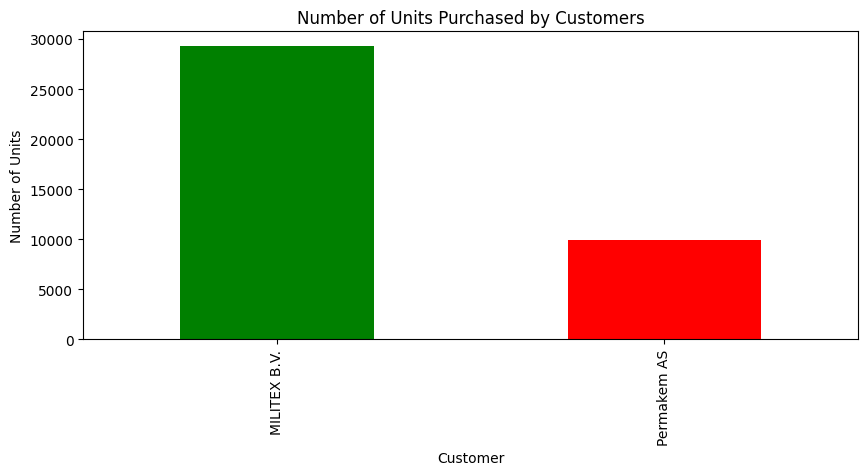

In [9]:
filtered_df = df[df['Customer'].isin(['Permakem AS', 'MILITEX B.V.'])]

customer_quantity = filtered_df.groupby('Customer')['Quantity'].sum()

plt.figure(figsize=(10, 4))
customer_quantity.plot(kind='bar', color=['green', 'red'])
plt.title('Number of Units Purchased by Customers')
plt.xlabel('Customer')
plt.ylabel('Number of Units')
plt.show()


*Top 3 customers by sales quantity*

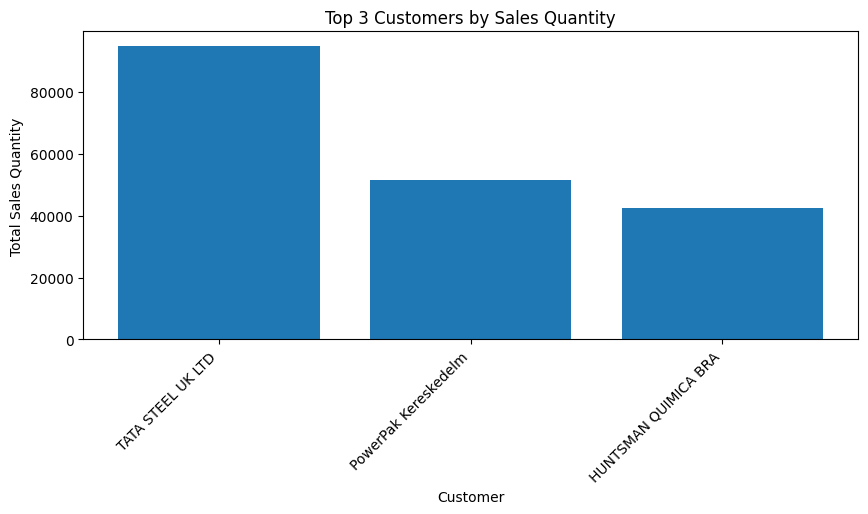

In [10]:
customer_sales = df.groupby('Customer')['Quantity'].sum().reset_index()
customer_sales_sorted = customer_sales.sort_values(by='Quantity', ascending=False)
top_3_customers = customer_sales_sorted.head(3)
plt.figure(figsize=(10,4))
plt.bar(top_3_customers['Customer'], top_3_customers['Quantity'])

plt.title('Top 3 Customers by Sales Quantity')
plt.xlabel('Customer')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45, ha='right')  
plt.show()

*Top 3 countries by sales quantity*
* Bulgaria stands out as the top purchaser, having acquired the highest number of units, followed by Indonesia and Poland.

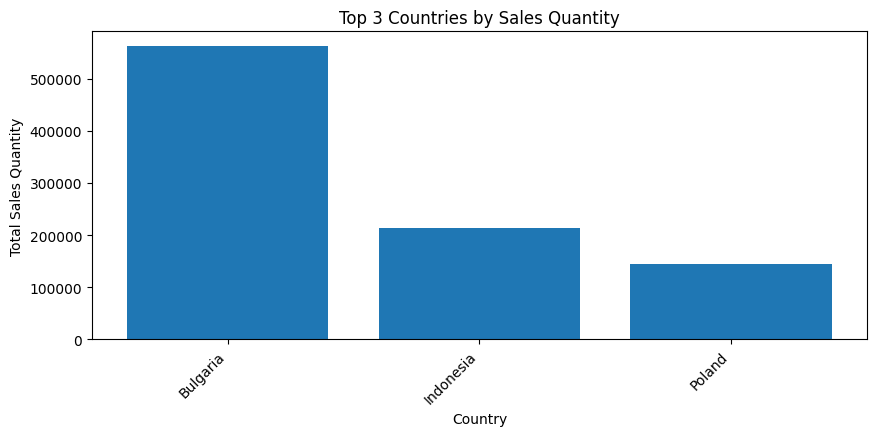

In [11]:
country_sales = df.groupby(['Country'])['Quantity'].sum().reset_index()

country_sales_sorted = country_sales.sort_values(by='Quantity', ascending=False)
top_3_countries = country_sales_sorted.head(3)
plt.figure(figsize=(10, 4))
plt.bar(top_3_countries['Country'], top_3_countries['Quantity'])
plt.title('Top 3 Countries by Sales Quantity')
plt.xlabel('Country')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45, ha='right')  
plt.show()

*Top 3 countries by revenue they generated*
* Bulgaria, Indonesia, Morocco

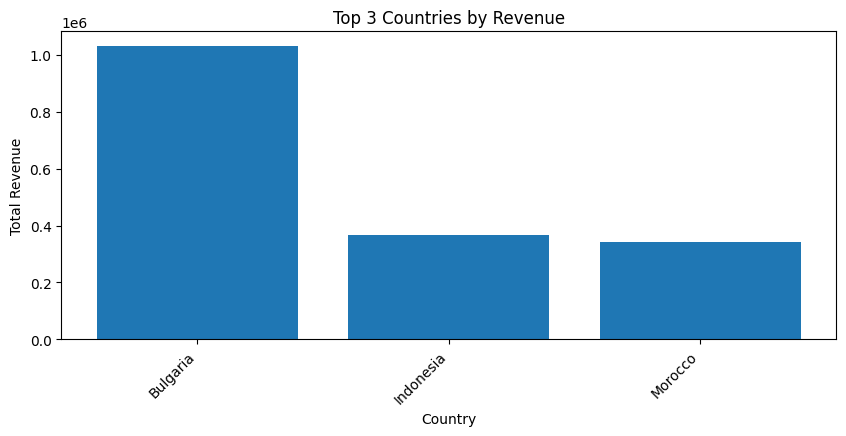

In [12]:
country_revenue = df.groupby(['Country'])['Final Price'].sum().reset_index()

country_revenue_sorted = country_revenue.sort_values(by='Final Price', ascending=False)
top_3_countries = country_revenue_sorted.head(3)
plt.figure(figsize=(10, 4))
plt.bar(top_3_countries['Country'], top_3_countries['Final Price'])
plt.title('Top 3 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')  
plt.show()

*Now, let's explore the insights we can gather from the stock codes.*
* Stock Code 85123A is the most frequent one
    * This may indicate that the stock is actively traded and attracts more attention
    

In [13]:

stock_code_counts = df['Stock Code'].value_counts()

stock_code_frequency_df = pd.DataFrame({
    'Stock Code': stock_code_counts.index,
    'Frequency': stock_code_counts.values
})

stock_code_frequency_df = stock_code_frequency_df.sort_values(by='Frequency', ascending=False)
print(stock_code_frequency_df)


     Stock Code  Frequency
0        85123A       1324
1             #       1244
2         22423       1113
3         47566        986
4        85099B        875
...         ...        ...
3145     90026A          1
3146      85109          1
3147      23353          1
3148      23351          1
3289     90214Y          1

[3290 rows x 2 columns]


* ... let's take a look of a total revenue of each stock
     * Stock Code 22423 is the stock with the highest total revenue

In [14]:
stock_total_revenue = df.groupby('Stock Code')['Final Price'].sum().reset_index()

stock_total_revenue = stock_total_revenue.sort_values(by='Final Price', ascending=False)

print(stock_total_revenue)

     Stock Code  Final Price
1261      22423    110670.00
2923     85123A     63602.00
2304      47566     57801.15
2909     85099B     50889.28
2476      82484     33183.30
...         ...          ...
2668      84731         0.78
2518      84227         0.42
100       17174         0.42
2442     79151B         0.42
237       20869         0.39

[3290 rows x 2 columns]


* ... let's visualize the Stock Codes 22423 and 85123A against the total units sold and average price per unit
    * analyzing the plot, it's apparent that while 85123A stands out as the most frequent stock code, stock code 22423 exhibits a considerably higher average price per unit

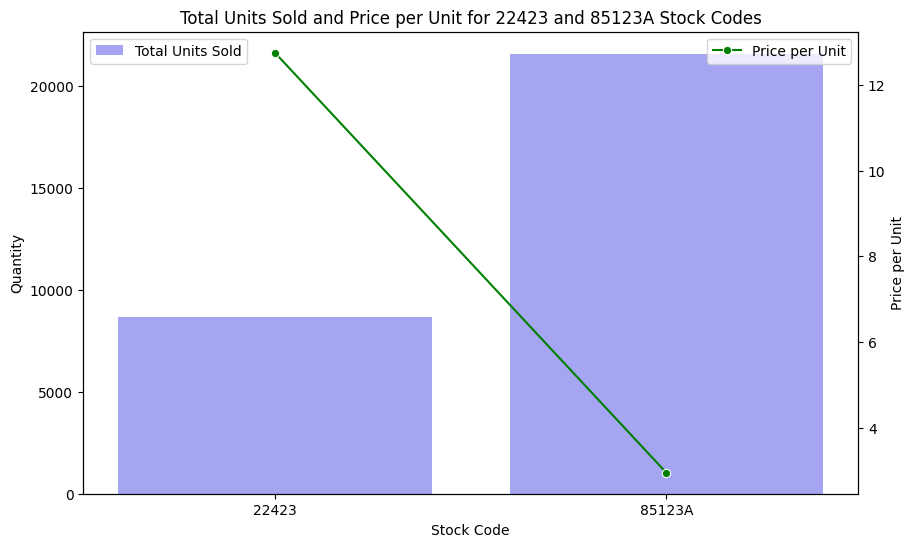

In [15]:
stock_codes = ['22423', '85123A']
stocks_df = df[df['Stock Code'].isin(stock_codes)]

stock_summary = stocks_df.groupby('Stock Code').agg({
    'Quantity': 'sum',
    'Price per Unit': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(x='Stock Code', y='Quantity', data=stock_summary, color='blue', alpha=0.4, label='Total Units Sold') # Bar plot for total units sold

ax2 = plt.twinx()
sns.lineplot(x='Stock Code', y='Price per Unit', data=stock_summary, color='green', marker='o', label='Price per Unit', ax=ax2) # Line plot for price per unit

plt.title('Total Units Sold and Price per Unit for 22423 and 85123A Stock Codes')
plt.legend()
plt.show()


**In the upcoming section, we will delve into a monthly breakdown and analysis.**


*Next, we'll examine the monthly sales quantity to identify the month with the highest number of units sold.*
* May is the month with the highest number of units sold.

In [16]:
# We have the Invoice Month and day of a week columns, let's make a Year column
df['Year'] = df['Invoice Date'].dt.year

monthly_sales = df.groupby(['Year', 'Invoice Month'])['Quantity'].sum().reset_index()

max_sales_month = monthly_sales.loc[monthly_sales['Quantity'].idxmax()]

print("Monthly sales data: \n", monthly_sales)

print("Month with the highest sales: \n", max_sales_month)

Monthly sales data: 
    Year Invoice Month  Quantity
0  2010      December    294280
1  2011         April    272735
2  2011        August     75669
3  2011      February    245667
4  2011       January    261428
5  2011          July    352989
6  2011          June    358223
7  2011         March    338685
8  2011           May    359788
Month with the highest sales: 
 Year               2011
Invoice Month       May
Quantity         359788
Name: 8, dtype: object


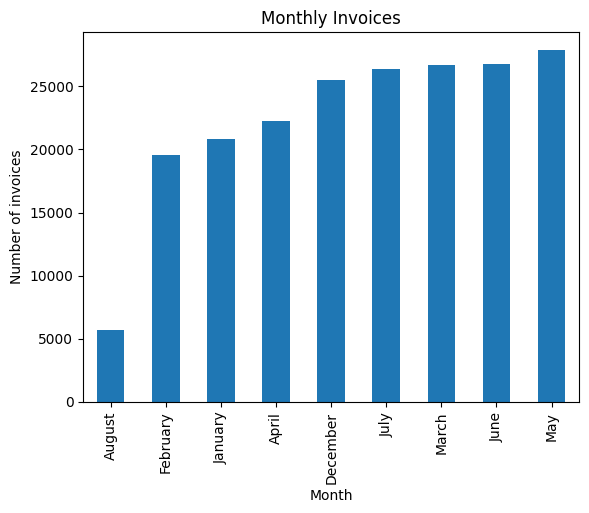

In [17]:
df['Invoice Month'].value_counts().sort_values().plot(kind='bar', xlabel='Month', ylabel='Number of invoices', title='Monthly Invoices');

# Based on the graph, we see that August is the month with the lowest issued invoices

*Month with the highest total revenue?*
* May, again, is the month with the highest revenue.

In [18]:
monthly_revenue = df.groupby(['Year', 'Invoice Month'])['Final Price'].sum().reset_index()

max_revenue_month = monthly_revenue.loc[monthly_revenue['Final Price'].idxmax()]

print("Monthly revenue: \n", monthly_revenue)

print("Month with the highest total revenue: \n", max_revenue_month)

Monthly revenue: 
    Year Invoice Month  Final Price
0  2010      December    618389.97
1  2011         April    458344.51
2  2011        August    124746.77
3  2011      February    468300.26
4  2011       January    514801.28
5  2011          July    625316.14
6  2011          June    674806.05
7  2011         March    617722.83
8  2011           May    700307.65
Month with the highest total revenue: 
 Year                  2011
Invoice Month          May
Final Price      700307.65
Name: 8, dtype: object


In [28]:
custom_order = df['Invoice Month'].unique()
#print(custom_order)
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'December']
print(custom_order)

# we need to convert 'Invoice Month' to a categorical data type because of a sorting 
df['Invoice Month'] = pd.Categorical(df['Invoice Month'], categories=custom_order, ordered=True)


['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'December']


*Monthly revenue trends*
* We will specifically focus on the year 2011 since the data for 2010 is available only for December.

* As we already saw, May is the month with the highest revenue
* After May, we observe a gradual decline in revenue, reaching a significant decrease in August
* Based on this, we can conclude that the peak months are May, June, and July

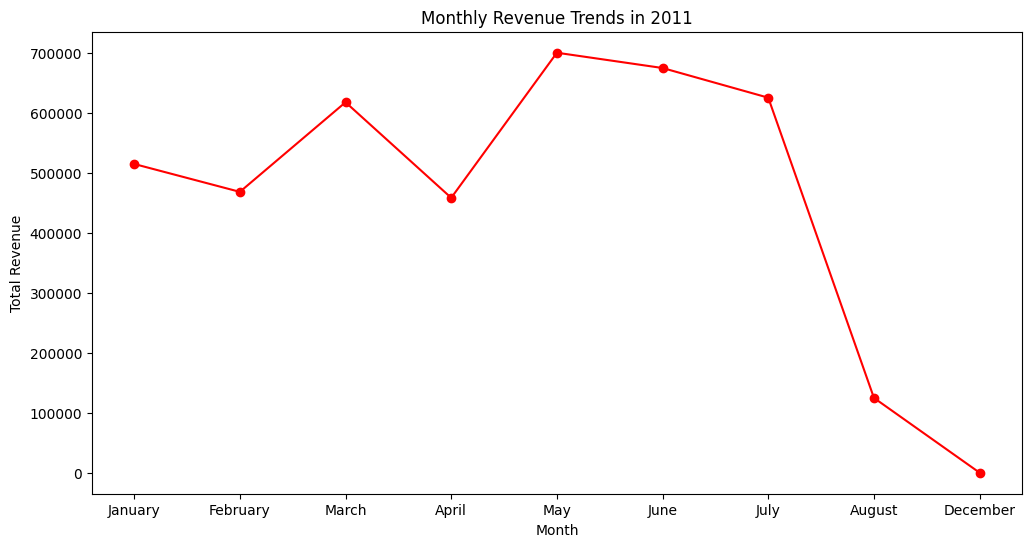

In [29]:
df_2011 = df[df['Year'] == 2011]

monthly_revenue_2011 = df_2011.groupby('Invoice Month')['Final Price'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue_2011['Invoice Month'], monthly_revenue_2011['Final Price'], marker='o', linestyle='-', color='r')

plt.title('Monthly Revenue Trends in 2011')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

* Let's check monthly sales trends
    * As before, we can conclude that peak months for sale are May, June and July

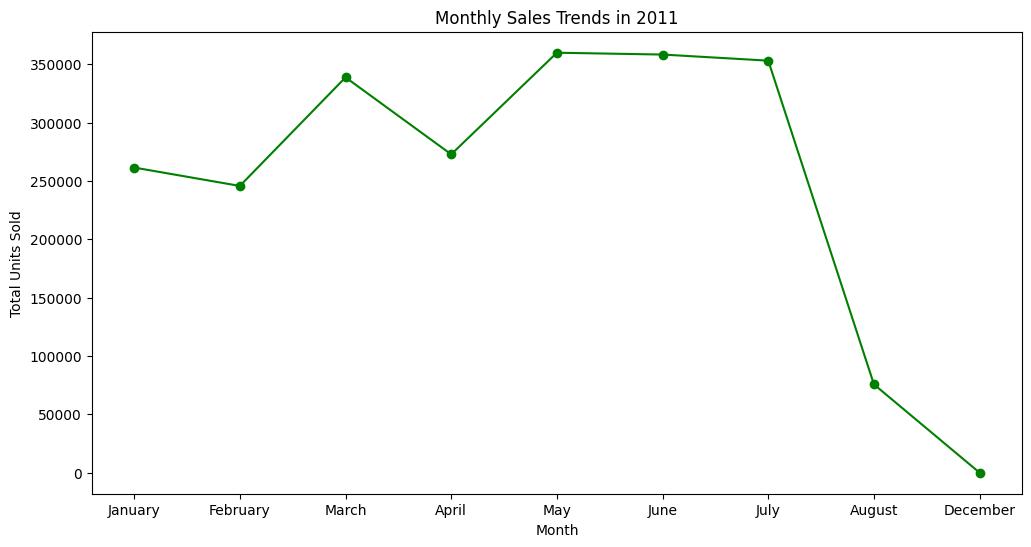

In [30]:
monthly_sales_2011 = df_2011.groupby('Invoice Month')['Quantity'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_2011['Invoice Month'], monthly_sales_2011['Quantity'], marker='o', linestyle='-', color='g')

plt.title('Monthly Sales Trends in 2011')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.show()

* I'm interested in the units sold for each day of the week, grouped by each month in the year 2011
    * From the line chart we observe that in every month, towards the end of the week, there is a notable increase in the number of units sold

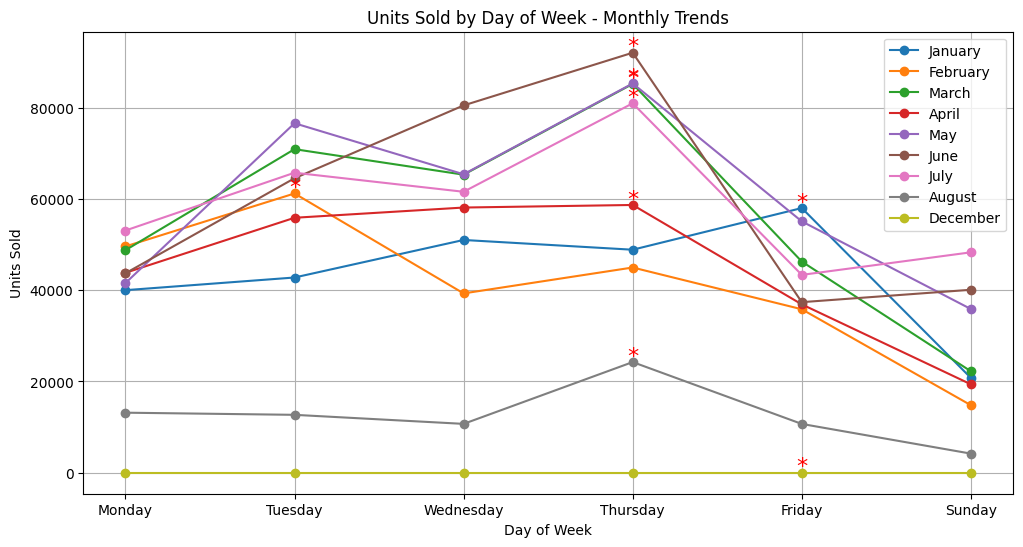

In [143]:
monthly_daily_sales = df_2011.groupby(['Invoice Month', 'Day of week'])['Quantity'].sum().reset_index()

monthly_daily_sales['Day of week'] = pd.Categorical(monthly_daily_sales['Day of week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

best_days = monthly_daily_sales.loc[monthly_daily_sales.groupby('Invoice Month')['Quantity'].idxmax()] # best day for sale for every month

monthly_daily_sales = monthly_daily_sales.sort_values(['Invoice Month', 'Day of week'])

plt.figure(figsize=(12, 6))
for month, data in monthly_daily_sales.groupby('Invoice Month'):
    plt.plot(data['Day of week'], data['Quantity'], marker='o', label=month)

for _,i in best_days.iterrows():
    plt.annotate('*', xy=(i['Day of week'], i['Quantity']), ha='center', fontsize=16, color='red')

plt.title('Units Sold by Day of Week - Monthly Trends')
plt.xlabel('Day of Week')
plt.ylabel('Units Sold')
plt.legend()
plt.grid(True)
plt.show()

* What is the overall top selling product?
    * DEMELAN 1990
    

In [31]:
product_sales = df.groupby('Sales Product')['Quantity'].sum().reset_index()
max_product = product_sales.loc[product_sales['Quantity'].idxmax()]

print("Products Sales Data:\n", product_sales)
print('The best selling product: \n ', max_product)

Products Sales Data:
              Sales Product  Quantity
0            HYDROBLUE® 90       861
1      NICOTINAMIDE EP/USP         4
2     (R)-1-PHENYLPROPYLAM         3
3     (S)-(+)-1-METHOXY-2-         5
4     (S)-1-PHENYLETHYLAMI        27
...                    ...       ...
3220               Z-COTE®       152
3221          ZN-GLYCINATE       328
3222           _LOROL C 16       985
3223           _LOROL C 18       667
3224     _MONOMULS 90-O 18       327

[3225 rows x 2 columns]
The best selling product: 
  Sales Product    DEMELAN 1990
Quantity                24466
Name: 513, dtype: object


* Presented below is a function that takes a country and DataFrame as input, providing a visualization of monthly sales trends for that specific country. The output includes insights into the top purchased product, the number of unique products purchased, the count of customers from the country and the total revenue generated.

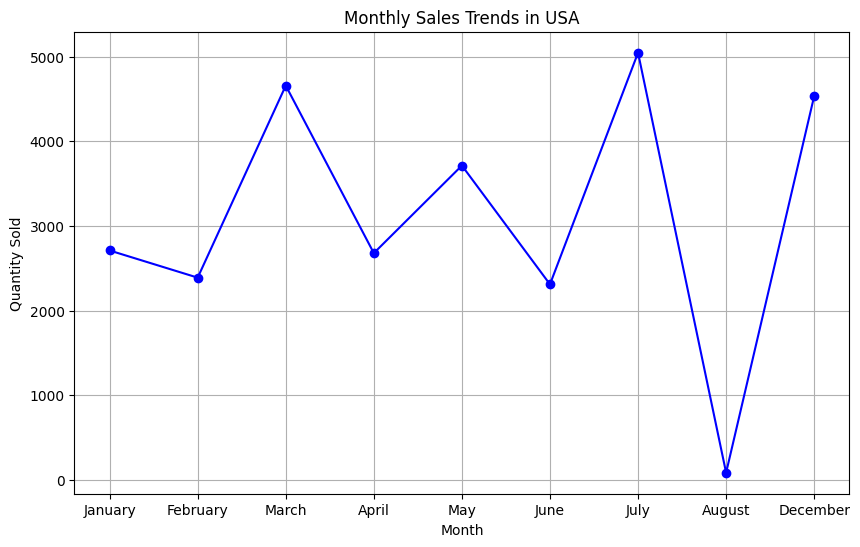

{'Top Purchased Product': 'AMMONIUM CHLORIDE RW', 'Number of Purchased Products': 1384, 'Total Revenue': 49359.44, 'Number of Customers': 23}


In [159]:
def analyze_country(country, df):

    country_data = df[df['Country'] == country]

    total_revenue = country_data['Final Price'].sum() # revenue
    top_product = country_data.groupby('Sales Product')['Quantity'].sum().idxmax() # top purchased product 
    number_of_products = country_data['Sales Product'].nunique() # number of purchased products
    number_of_customers = country_data['Customer ID'].nunique() # number of customers from that country

    # calculating monthly sales trends
    monthly_sales = country_data.groupby('Invoice Month')['Quantity'].sum()

    # plotting monthly sales trends
    plt.figure(figsize=(10, 6))
    monthly_sales.plot(kind='line', marker='o', color='b')
    plt.title(f'Monthly Sales Trends in {country}')
    plt.xlabel('Month')
    plt.ylabel('Quantity Sold')
    plt.grid(True)
    plt.show()

    result = {
        'Top Purchased Product': top_product,
        'Number of Purchased Products': number_of_products,
        'Total Revenue': total_revenue,
        'Number of Customers': number_of_customers
    }

    return result


result = analyze_country('USA', df) # for example, let's see what is the situation in USA
print(result)


* Now, we have a function designed to iterate over all countries, selecting the top n countries based on the highest revenue. It then proceeds to visualize the monthly sales trends for each of these top countries.

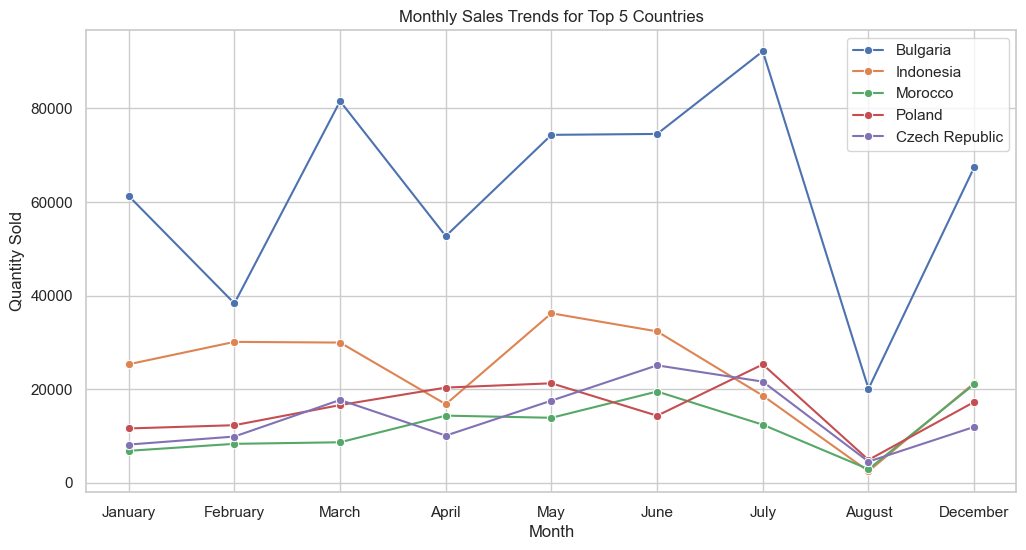

In [33]:
def loop_top_countries(df, top_n=5): # for example, we take top 5 countries

    country_revenue = df.groupby('Country')['Final Price'].sum()

    top_countries = country_revenue.nlargest(top_n).index

    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")
    
    for country in top_countries:
        country_data = df[df['Country'] == country]
        monthly_sales = country_data.groupby('Invoice Month')['Quantity'].sum()

        sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, label=country, marker='o')

    plt.title(f'Monthly Sales Trends for Top {top_n} Countries')
    plt.xlabel('Month')
    plt.ylabel('Quantity Sold')
    plt.legend()
    plt.show()


loop_top_countries(df)


* Now, we are keen on understanding the contribution of each operating division to the overall total revenue
    * The pie chart reveals that Intermediates have the most substantial impact on total revenue, while Monomers and Nutrition & Health contribute the least.

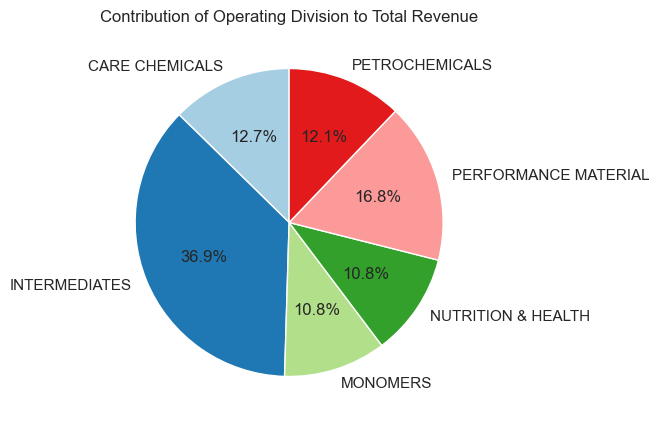

In [34]:
division_revenue = df.groupby('Operating Division')['Final Price'].sum().reset_index()

# plotting a pie chart
plt.figure(figsize=(5, 5))
plt.pie(division_revenue['Final Price'], labels=division_revenue['Operating Division'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Contribution of Operating Division to Total Revenue')
plt.show()


* Next, let's explore whether being a distributor correlates with purchasing higher quantities, visualizing the findings through a pie chart.
    * We can see from the pie chart that being a distributor does not necessarily correspond to higher unit purchases.

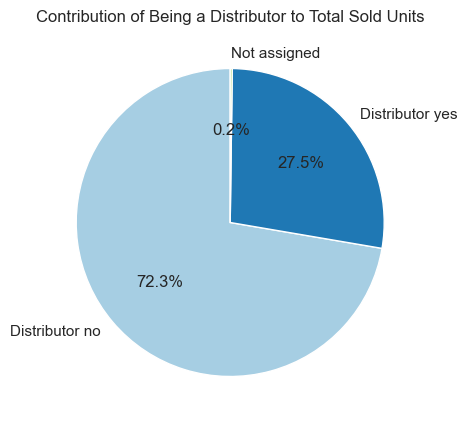

In [35]:
distributor_quantity = df.groupby('Distributor')['Quantity'].sum().reset_index()

plt.figure(figsize=(5, 5))
plt.pie(distributor_quantity['Quantity'], labels=distributor_quantity['Distributor'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Contribution of Being a Distributor to Total Sold Units')
plt.show()
